## Discovering impact of the Series 'Euphoria' through NLP
### Analysis based on posts and comments on the `r/euphoria` subreddit  

#### 2. EDA

Goal: Summarize main characteristics of dataset  
I: corpus and TDM  
O: trands in data if it makes sense  

Some ideas:  
- top words for each post
- vocabulary
- profanity
- specific drug frequency 

`wordcloud` & `matplotlib`

In [36]:
# import data
import pandas as pd

data = pd.read_pickle('../dat/tdm_s1.pkl')
# rename rows
# data = data.rename(index = {0: 'A', 1: 'B', 2: 'C'})
data

,aback,abandon,abandonment,abash,abdoman,abduct,abey,abhorent,abide,abie,...,zombie,zomer,zomg,zone,zongao,zote,zoya,zrue,zsuzsana,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**19,038 comments(documents)**

In [37]:
# get the top 30 words

def get_top(df):
    freq = []
    for word in df.columns:
        freq.append((word, df[word].sum()))
    freq = sorted(freq, key=lambda x: x[1], reverse=True)
    return freq[:30]

In [38]:
get_top(data)

[('rue', 11835),
 ('like', 7708),
 ('think', 7253),
 ('jule', 7117),
 ('know', 4599),
 ('say', 4395),
 ('people', 3927),
 ('drug', 3719),
 ('make', 3613),
 ('feel', 3319),
 ('character', 3061),
 ('want', 2892),
 ('really', 2827),
 ('thing', 2547),
 ('nate', 2465),
 ('love', 2390),
 ('way', 2361),
 ('good', 2107),
 ('time', 2106),
 ('cassie', 2017),
 ('elliot', 2011),
 ('fez', 1900),
 ('addict', 1809),
 ('bad', 1753),
 ('relationship', 1625),
 ('tell', 1590),
 ('try', 1562),
 ('stil', 1549),
 ('lot', 1502),
 ('use', 1495)]

In [39]:
# thinking need to go back to `analysis.ipynb` and lemmatize the words. brb.

Thinking: if all three posts have the same top words - it may not provide any meaningul insight. Should write a logic to add words to the stopwords list if the word is common for all posts

In [40]:
# add_stopwords = [word for word, count in Counter(words).most_common() if count == 3]
add_stopwords = ['i', 'just','did', 'ab', 'amp', 'ml', 'xb','abc', 'abcb', 'abcny', 'abd', 'abdabca', 'fs', 
                  'zpqxhxhzanapjsjbf', 'zqcsrpwsge', 'zqnuhckwdqwrhkuo', 'zs', 'zshwbhethehenozxfyqg',
                  'zsmkbrmwngzsibrntkt', 'zy', 'zwhnrmujykdxmntiub', 'afqjcnguytghbsuvixmglpwzqbg', 'ebecadcbdfcbafbdb',
                  'abfbmltmqspf', 'abfafebfbad', 'episode', 'season']
# add new stop words
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS.union(add_stopwords)

In [41]:
# update TDM with new list of stop words
from sklearn.feature_extraction.text import CountVectorizer

# read cleaned data
corpus = pd.read_pickle('../dat/corpus.pkl')

In [42]:
# recreate TDM
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(corpus[0])
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = corpus.index

In [43]:
# pickle TDM
import pickle
pickle.dump(cv, open('../dat/cv_stop.pkl', 'wb'))
data_stop.to_pickle('../dat/tdm_stop.pkl')

**Visualize**

In [44]:
# create a list of all the words in all the comments
comment_word_ls = []
for comment in corpus[0]:
    words = comment.split()
    for word in words:
        comment_word_ls.append(word)

In [45]:
comment_words = ' '.join(comment_word_ls)

In [46]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color='white',colormap = 'Dark2', max_font_size=40, random_state=2022, max_words=100)

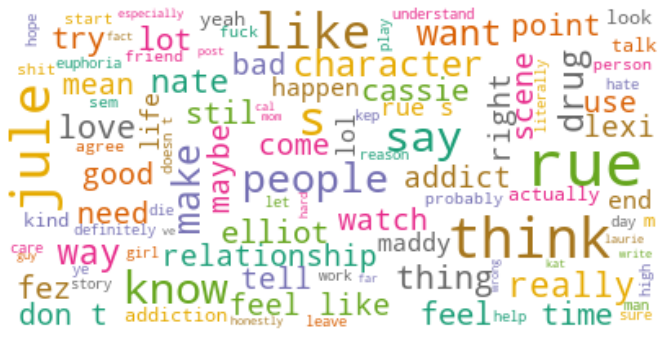

In [47]:
plt.rcParams['figure.figsize'] = (16, 6)
wc.generate(comment_words)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('../img/wc_s2.png', dpi = 300)
plt.show()

#### 2.2 Vocabulary

In [48]:
data.head()

,aback,abandon,abandonment,abash,abdoman,abduct,abey,abhorent,abide,abie,...,zombie,zomer,zomg,zone,zongao,zote,zoya,zrue,zsuzsana,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
term_document_matrix = data.T
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

In [50]:
# Top 100 words 
term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)[:100] 

# Print the first 10 rows 
print(term_document_matrix.drop(columns=['total_count']).head(10))

        0      1      2      3      4      5      6      7      8      9      \
rue         0      1      0      0      0      0      0      0      0      0   
like        0      0      0      0      1      2      0      1      0      0   
think       0      0      1      1      0      1      1      0      1      0   
jule        0      0      0      0      0      0      0      0      0      0   
know        0      0      0      0      0      0      0      0      0      0   
say         0      0      0      0      0      0      0      0      0      0   
people      0      0      0      0      0      1      0      0      0      0   
drug        0      0      0      0      0      1      0      0      0      0   
make        0      0      0      0      0      0      0      0      0      0   
feel        0      0      0      0      1      1      0      0      0      0   

        ...  19028  19029  19030  19031  19032  19033  19034  19035  19036  \
rue     ...      2      1      4      1  

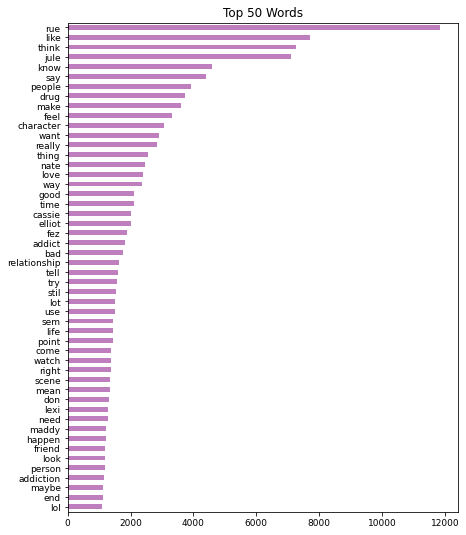

In [51]:
# vertical bar plot of top 50 in ascending order
df_sorted = term_document_matrix.sort_values(by ='total_count', ascending= False)[0:50]
df_sorted['total_count'].plot(kind='barh', figsize=(7,9), color='purple', 
                              alpha=0.5, title='Top 50 Words', 
                                legend=False, fontsize=9).invert_yaxis()



**Looking at the frequency of certain drug related words**

In [52]:
# isolate drug words
drug_words = ['drug', 'drugs', 'addict', 'addiction', 'opiate', 'opioids', 'dope', 'marijuana'
                   'weed', 'zoloft', 'xanax', 'high', 'dose', 'trigger', 'triggering', 'relapse', 'sober', 'sobriety','fentanyl',
                   'heroin', 'crack', 'cocaine', 'amphetamine', 'speed', 'acid', 'ecstasy', 'lsd', 'shrooms',
                   'psychadelics', 'narcotic', 'rehab', 'recovery', 'treatment', 'methadone', 'naloxone']

# filter data if any column is in drug_words
filter_ls = [data_stop.columns[i] in drug_words for i in range(len(data_stop.columns))]
drug_cols = data_stop[data_stop.columns[filter_ls]]
# arrange columns by values
drug_cols = drug_cols.sort_values(by=drug_cols.columns[0], ascending=False)
drug_cols

,acid,addict,addiction,amphetamine,cocaine,crack,dope,dose,drug,ecstasy,...,narcotic,opiate,opioids,recovery,rehab,relapse,sober,sobriety,treatment,xanax
17417,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1361,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
18537,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16928,1,0,0,0,1,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
17987,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6345,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6343,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='rue', ylabel='jule'>

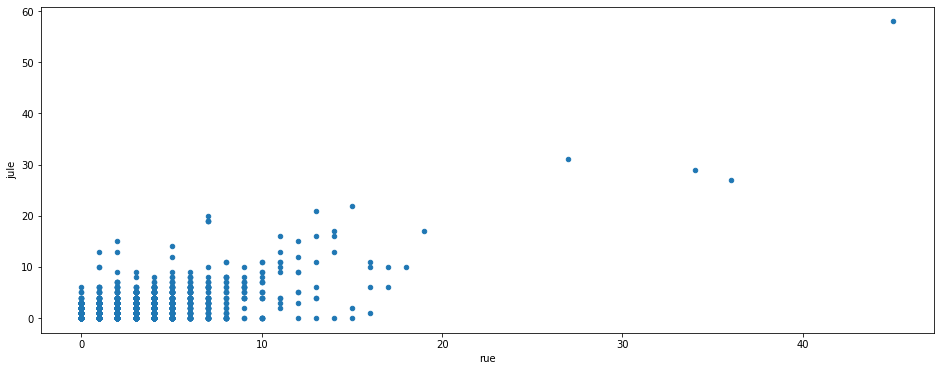

In [54]:
# Locate rue and elliot in the documents, example
term_document_matrix.loc[['rue', 'jule']].T

# Create a scatterplot of the frequencies
term_document_matrix.drop(columns=['total_count']).T.plot.scatter(x='rue', y='jule')

<AxesSubplot:xlabel='rue', ylabel='addiction'>

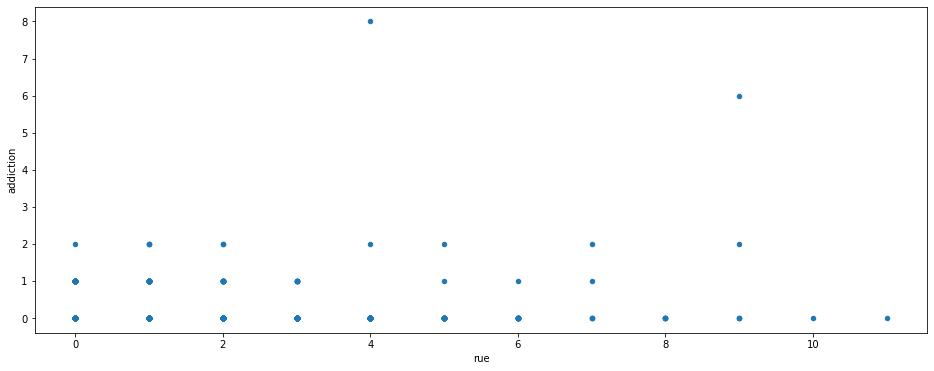

In [ ]:
# let's try rue and fentanyl
term_document_matrix.loc[['rue', 'addiction']].T

# Create a scatterplot of the frequencies
term_document_matrix.drop(columns=['total_count']).T.plot.scatter(x='rue', y='addiction')

this is a scatterplot of frequencies for rue and elliot across 100 documents(comments).

**Cosine Similarity**

In [ ]:
# keep TDM only with the top 100 words - full vocabulary takes too long
# term_document_matrix = data.T

In [ ]:
# Activate math
# import math

# # Define a cosine similarity function
# def cosine_similarity(a,b):
#     "compute cosine similarity of v1 to v2: (a dot b)/{||a||*||b||)"
#     sumxx, sumxy, sumyy = 0, 0, 0
#     for i in range(len(a)):
#         x = a[i]; y = b[i]
#         sumxx += x*x
#         sumyy += y*y
#         sumxy += x*y
#     return sumxy/math.sqrt(sumxx*sumyy)

In [ ]:
# cosine similarity function for all comments
# account for zero values to avoid division by zero

# from sklearn.metrics.pairwise import cosine_similarity

# # compute cosine similarity between all comments
# # using term_document_matrix

# def comment_sim(mat):
#     # pair wise similarity between all comments
#     sim = cosine_similarity(mat)
#     # create a dataframe of the similarities
#     sim_df = pd.DataFrame(sim, columns=mat.index, index=mat.index)
#     # return the dataframe
#     return sim_df

In [ ]:
# test = comment_sim(term_document_matrix)

In [ ]:
# cosine similarity heat map
# import matplotlib.pyplot as plt

# rename 
# documents = ['com ' + str(i) for i in range(len(term_document_matrix.columns))]

In [ ]:
# create a heatmap of the similarities

# fig, ax = plt.subplots(figsize=(10,10))
# ax.set_xticks(range(len(documents)))
# ax.set_yticks(range(len(documents)))
# ax.set_xticklabels(documents, rotation=90)
# ax.set_yticklabels(documents)
# plt.imshow(test, cmap='hot', interpolation='nearest')
# plt.colorbar()
# plt.show()

---

Re-attempt at TDM, CS, and heatmap but with subset of original data

In [ ]:
# Count Vectorizer
vect = CountVectorizer(stop_words=stop_words)  
vects = vect.fit_transform(corpus[0])

# Select the first fifty rows from the data set
td = pd.DataFrame(vects.todense()).iloc[:50]  
td.columns = vect.get_feature_names()
term_document_matrix2 = td.T
term_document_matrix2.columns = ['Doc '+str(i) for i in range(1, 51)]
term_document_matrix2['total_count'] = term_document_matrix2.sum(axis=1)

# Top 100 words 
term_document_matrix2 = term_document_matrix2.sort_values(by ='total_count',ascending=False)[:100] 

# Print the first 10 rows 
print(term_document_matrix2.drop(columns=['total_count']).head(10))

           Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
rue            0      1      0      0      0      0      0      0      0   
like           0      0      0      0      1      2      0      1      0   
addict         0      0      0      0      0      1      0      0      0   
people         0      0      0      0      0      1      0      0      0   
think          0      0      1      1      0      1      1      0      1   
person         0      0      0      0      0      0      0      0      0   
bad            0      0      0      0      0      0      0      0      0   
addiction      0      0      0      0      0      0      0      0      2   
hate           0      0      0      0      0      0      0      0      0   
acurate        0      0      0      0      0      0      0      1      0   

           Doc 10  ...  Doc 41  Doc 42  Doc 43  Doc 44  Doc 45  Doc 46  \
rue             0  ...       0       1       0       0       1       0   
like           

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Activate math
import math

# Define a cosine similarity function


def cosine_similarity(a, b):
    "compute cosine similarity of v1 to v2: (a dot b)/{||a||*||b||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(a)):
        x = a[i]
        y = b[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    if sumxx == 0 or sumyy == 0:
        return 0
    else:
        return sumxy/math.sqrt(sumxx*sumyy)


In [ ]:
# Activate numpy
import numpy as np 

# Save the similarity index between the documents
def pair(s):
    for i, v1 in enumerate(s):
        for j in range(i+1, len(s)):
            yield [v1, s[j]]

In [ ]:
#  calculate similiarity index for each document
dic={} 
for (a,b) in list(pair(term_document_matrix2.columns)):
  dic[(a,b)] = cosine_similarity(term_document_matrix2[a].tolist(), term_document_matrix2[b].tolist())

# Print the cosine similarity index
# print(dic)

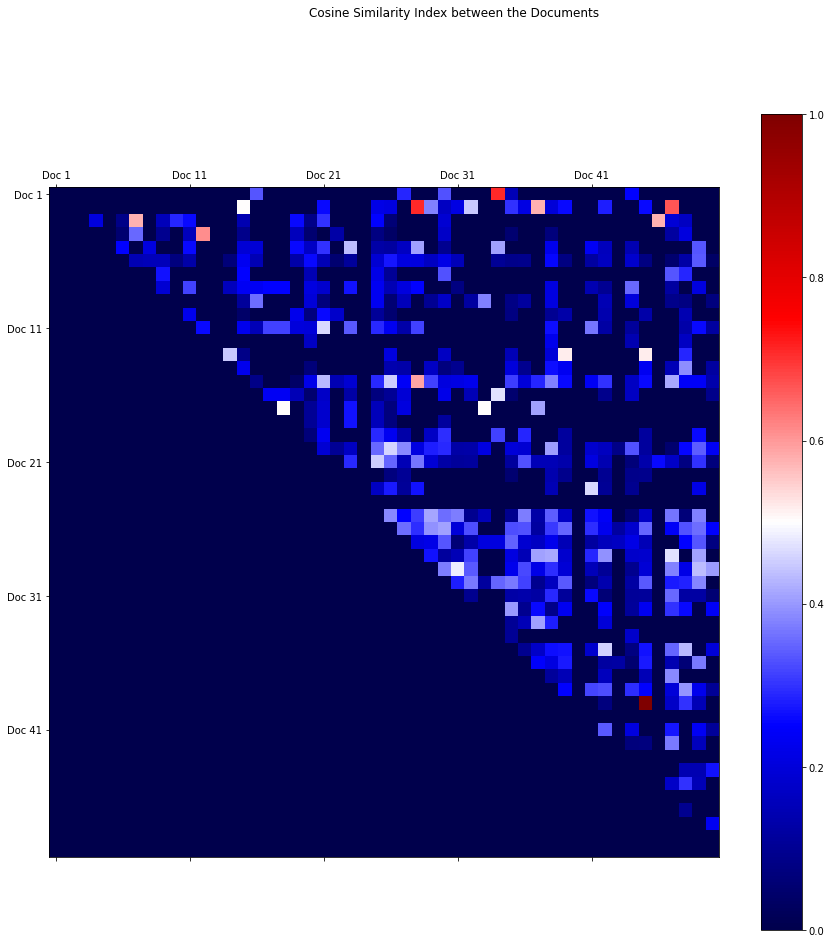

In [ ]:
documents= ['Doc ' + str(i) for i in range(1, 51)]
final_df = pd.DataFrame(np.asarray([[(dic[(x,y)] if (x,y) in dic else 0) for y in documents] for x in documents]))
final_df.columns =  documents
final_df.index = documents 

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xticks(np.arange(len(documents)))
ax.set_yticks(np.arange(len(documents)))
ax.set_xticklabels(documents)
ax.set_yticklabels(documents)
# for (i, j), z in np.ndenumerate(final_df):
#   if z != 0 :
#     ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
#             bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
#   else:
#     None
fig.suptitle('Cosine Similarity Index between the Documents')
# show legend
ax.matshow(final_df, cmap='seismic')
fig.colorbar(mappable=ax.matshow(final_df, cmap='seismic'))
plt.show()

In [ ]:
# get the set of documents that are the most similar together
# score > .675

sim_docs = []
for i in range(len(final_df.columns)):
    for j in range(i+1, len(final_df.columns)):
        if final_df.iloc[i,j] > .675:
            sim_docs.append((final_df.columns[i], final_df.columns[j]))

In [ ]:
print(sim_docs)

[('Doc 1', 'Doc 34'), ('Doc 2', 'Doc 28'), ('Doc 39', 'Doc 45')]


In [ ]:
rows = [i[0] for i in sim_docs]
cols = [i[1] for i in sim_docs]
sim_docs_df = final_df.loc[rows, cols]
sim_docs_df

,Doc 34,Doc 28,Doc 45
Doc 1,0.707107,0.000000,0.000000
Doc 2,0.000000,0.707107,0.258199
Doc 39,0.000000,0.000000,1.000000


In [ ]:
# let's grab the original comment for the documents we want
# for doc30, doc27, doc26, doc25

doc_1 = corpus[0][0]
doc_17 = corpus[0][16]
doc_18 = corpus[0][17]
doc_34 = corpus[0][33]
doc_39 = corpus[0][38]
doc_45 = corpus[0][44]

print("**Documents 1 and 34**: \n", '--', doc_1, '\n' '--', doc_34)
print('**Documents 17 and 18**: \n', '--', doc_17, '\n', '--', doc_18)
print('**Documents 39 and 45**: \n','--', doc_39, '\n', '--', doc_45)

**Documents 1 and 34**: 
 -- it be a turning point for the series fs 
-- you be mis the point of the show I feel sorry for you
**Documents 17 and 18**: 
 -- I be curious so I read the r opiate discusion on the episode and they agree it s acurate there s not a single negative comment 
 -- crazy acurate I be only ever a drinker and just the hiding and lying and range of emotion bring I back
**Documents 39 and 45**: 
 -- rue might sem selfish at time and to catch up in her own mess to see how she s hurt other she might do bad thing to get what she want but dep down she s not a bad person with malicious intent she s an addict who be not at war with other but with herself 
 -- rue might sem selfish at time and to catch up in her own mess to see how she s hurt other she might do bad thing to get what she want but dep down she s not a bad person with malicious intent she s an addict who be not at war with other but with herself
